# <center> VGG16 avec Keras </center>

**Source :** Cours de Franck Bardol, [LinkedIn Learning](https://www.linkedin.com/learning/decouvrir-le-deep-learning-avec-keras/preparer-ses-donnees-pour-reutiliser-les-meilleurs-modeles-de-keras?autoSkip=true&autoplay=true&resume=false).

In [ ]:
"""
Created on Sun Dec 16 18:50:32 2018

@author: franck
"""


'\nCreated on Sun Dec 16 18:50:32 2018\n\n@author: franck\n'

# Ré-utiliser un modèle de production avec Keras

## Objectif
Nous allons voir comment ré-utiliser facilement un modèle de production et entrainé par des spécialistes sur des millions d'images.


Ce modèle a été construit par le laboratoire de recherche **Oxford Visual Geometry Group** .
Ce modèle a pour nom VGG16.

Le modèle VGG a remporté la compétition **ImageNet** ILSVRC 

(ImageNet Large Scale Visual Recognition Challenge).

La compétition réunie chaque année les meilleures laboratoires de recherche sur le sujet et permet de faire avancer l'état de l'art.


## Importer VGG16


```
from  keras.applications.vgg16 import  VGG16
model = VGG16()
```

Ces instructions provoque le chargement des poids du modèle (528 MB) dans le répertoire :
/.keras/models directory

Le téléchargement n'a lieu **qu'une** seule fois. Une fois, téléchargés les poids sont ensuite lus depuis le disque.

In [2]:
from  keras.applications.vgg16 import  VGG16
model = VGG16()

## Structure du modèle VGG


### Exercice : 
* Observez et commentez la structure du modèle VGG
* combien de paramètres le modèle comporte-t-il ?

Aide : utilisez la fonction 

```
summary()
```



In [3]:
#@title
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Réponse : Le modèle VGG16 comporte environ **140 millions** de paramètres.

## Les fichiers avec Google Colab files module
text import files ...

Vous pourrez sélectionner les fichiers à partir d'une interface graphique. 
Nous allons importer l'image '05-05-CNN-VGG-mug.jpg'



In [ ]:
from google.colab import files
dataset = files.upload()

## Affichage des images

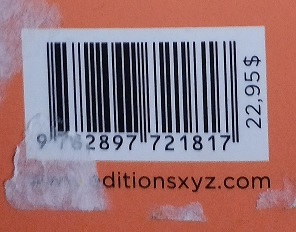

In [7]:
from IPython.display import Image
Image(filename='20221116_190312.jpg')

## Préparer l'image au format VGG
Les lignes de code prépare l'input (notre image) afin qu'il respecte le format attendu par le modèle VGG

In [23]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import  img_to_array
from keras.applications.vgg16 import preprocess_input

# chargement et redimension
image = load_img('20221116_190312.jpg' , target_size=(224, 224))

# convertir NumPy array
image = img_to_array(image)

# tensor rank 4 (#axis): samples, rows, columns, channels
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# preparation  VGG : soustraire la moyenne des pixels
image = preprocess_input(image)

## Prédiction avec VGG
VGG classifie les images d'entrée parmi **1,000** classes.

Il faut demander au modèle d'emettre une probabilité et ensuite extraire la probabilité la plus élévée.
Cette probabilité la plus élevée est la classe à laquelle appartient l'objet (du point de vue du modèle).

In [24]:
#predict()  : probabilite (1,000 types d objet)
proba = model.predict(image)

# dimension ?
print(proba.shape)

# le plus grand ?
import numpy as np
print("proba = " , proba)
print("position max = " , np.argmax(proba))



1/1 [==============================] - 1s 607ms/step
(1, 1000)
proba =  [[8.91917580e-07 1.20227251e-05 6.27536451e-07 4.06742515e-07
  5.05249147e-07 2.40029726e-06 1.29737498e-06 6.68662096e-06
  1.42854094e-06 2.77474987e-06 1.13589056e-06 1.27499743e-06
  2.08661390e-06 5.20161439e-06 1.77311176e-06 1.42167346e-06
  7.01333192e-07 1.96171823e-06 5.58429247e-06 3.08237190e-06
  6.14954672e-07 2.43645059e-06 2.82865676e-06 6.27329200e-06
  2.98631517e-06 1.11027737e-06 1.60560808e-06 6.72062606e-06
  1.04531034e-06 1.41954376e-06 6.50309744e-08 4.50064505e-07
  6.27520308e-07 4.04456870e-07 4.43299314e-06 1.31545818e-07
  1.99710098e-06 2.69671091e-07 3.03352226e-06 3.16649079e-07
  1.99517240e-06 9.24934625e-07 1.12246107e-06 1.85055308e-06
  4.76023843e-07 1.53338715e-06 2.20074253e-06 7.10161544e-07
  3.17302039e-07 2.45059908e-07 2.64581814e-07 5.26898873e-07
  1.95481221e-06 1.08679740e-06 5.93788400e-07 2.40701240e-07
  1.67754109e-07 9.96752647e-07 2.73241767e-07 1.35805038e-0

## Reconnaissance de l'image
Il ne reste plus qu'à décoder la prédiction afin d'obtenir le label de l'objet (type)

In [25]:
# interpretation proba
from keras.applications.vgg16 import decode_predictions
# proba -> class label
label = decode_predictions(proba)

print("5 best :")
print(label)

print("type = " ,  label[0][0][1])
print("proba = " ,  label[0][0][2])

5 best :
[[('n07248320', 'book_jacket', 0.5219238), ('n03871628', 'packet', 0.09988257), ('n03291819', 'envelope', 0.025297731), ('n04270147', 'spatula', 0.02266379), ('n03876231', 'paintbrush', 0.02251582)]]
type =  book_jacket
proba =  0.5219238
